In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.tree import plot_tree

In [2]:
company=pd.read_csv('D:\dinesh document\EXCELR\Data Science\Assingment\Random Forest\Company_Data.csv')

## EDA

In [45]:
company.shape

(400, 11)

In [47]:
company.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [3]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
company.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
company.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
# check null value
company.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

### No missing value and no Outlier in Dataset

## Visualization

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='ShelveLoc', ylabel='count'>

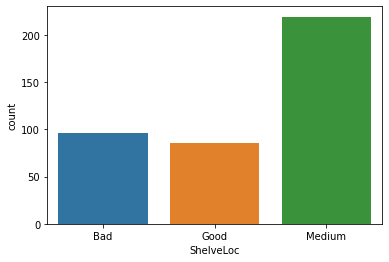

In [49]:
sns.countplot(company['ShelveLoc'])

C:\Users\Admin\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='CompPrice', ylabel='count'>

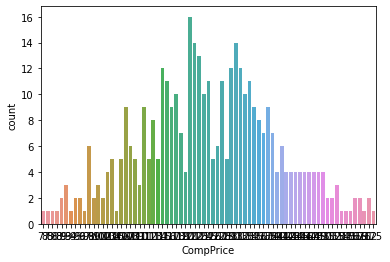

In [50]:
sns.countplot(company['CompPrice'])

<AxesSubplot:>

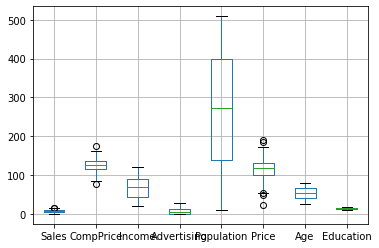

In [7]:
company.boxplot()

array([[<AxesSubplot:title={'center':'Advertising'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'CompPrice'}>],
       [<AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'Income'}>,
        <AxesSubplot:title={'center':'Population'}>],
       [<AxesSubplot:title={'center':'Price'}>,
        <AxesSubplot:title={'center':'Sales'}>, <AxesSubplot:>]],
      dtype=object)

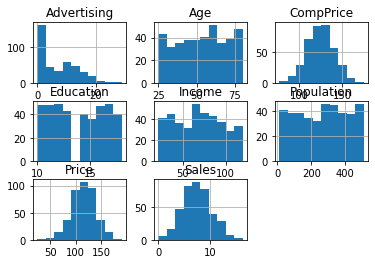

In [11]:
company.hist()

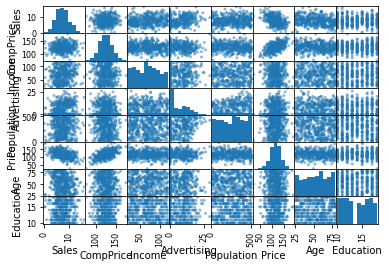

In [12]:
## Scatter plot & corr
pd.plotting.scatter_matrix(company)
plt.show()

In [13]:
company.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


<AxesSubplot:>

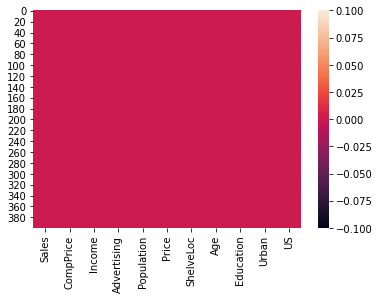

In [14]:
sns.heatmap(company.isnull())

In [15]:
from sklearn.preprocessing import OrdinalEncoder

In [16]:
oe=OrdinalEncoder()

In [17]:
company.loc[:,'Urban':'US']=oe.fit_transform(company.loc[:,'Urban':'US'])

In [18]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,1.0,1.0
1,11.22,111,48,16,260,83,Good,65,10,1.0,1.0
2,10.06,113,35,10,269,80,Medium,59,12,1.0,1.0
3,7.40,117,100,4,466,97,Medium,55,14,1.0,1.0
4,4.15,141,64,3,340,128,Bad,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,1.0,1.0
396,6.14,139,23,3,37,120,Medium,55,11,0.0,1.0
397,7.41,162,26,12,368,159,Medium,40,18,1.0,1.0
398,5.94,100,79,7,284,95,Bad,50,12,1.0,1.0


### Random Forest Classification

In [19]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

In [20]:
X=company[['Sales','CompPrice','Income','Advertising','Population','Price','Age','Education','Urban','US']]
Y=company['ShelveLoc']

In [21]:
X

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,Urban,US
0,9.50,138,73,11,276,120,42,17,1.0,1.0
1,11.22,111,48,16,260,83,65,10,1.0,1.0
2,10.06,113,35,10,269,80,59,12,1.0,1.0
3,7.40,117,100,4,466,97,55,14,1.0,1.0
4,4.15,141,64,3,340,128,38,13,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,1.0,1.0
396,6.14,139,23,3,37,120,55,11,0.0,1.0
397,7.41,162,26,12,368,159,40,18,1.0,1.0
398,5.94,100,79,7,284,95,50,12,1.0,1.0


In [22]:
Y

0         Bad
1        Good
2      Medium
3      Medium
4         Bad
        ...  
395      Good
396    Medium
397    Medium
398       Bad
399      Good
Name: ShelveLoc, Length: 400, dtype: object

In [25]:
# Splitting the dataset into the Training set and Test set
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [26]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

In [33]:
# Fitting the classifier into the Training set

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', max_features=3)
model.fit(X_Train,Y_Train)

RandomForestClassifier(criterion='entropy', max_features=3, n_estimators=200)

In [35]:
# Predicting the test set results

Y_Pred = model.predict(X_Test)
Y_Pred

array(['Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Bad', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Good', 'Medium', 'Bad', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Good', 'Medium', 'Bad', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Good', 'Medium', 'Medium', 'Medium', 'Medium',
       'Bad', 'Good', 'Medium', 'Good', 'Bad', 'Medium', 'Medium',
       'Medium', 'Good', 'Medium', 'Medium', 'Medium', 'Good', 'Good',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Good', 'Bad', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Good', 'Medium',
       'Medium', 'Good', 'Medium', 'Good', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Bad', 'Medium', 'Good', 'Medium', 'Bad',
       'Good', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
    

In [37]:
from sklearn.metrics import accuracy_score,classification_report

In [39]:
accuracy =accuracy_score(Y_Test,Y_Pred)
accuracy

0.6

In [40]:
print(classification_report(Y_Test,Y_Pred))

              precision    recall  f1-score   support

         Bad       0.33      0.15      0.21        20
        Good       0.73      0.46      0.56        24
      Medium       0.61      0.82      0.70        56

    accuracy                           0.60       100
   macro avg       0.56      0.48      0.49       100
weighted avg       0.58      0.60      0.57       100



In [42]:
kfold =KFold(n_splits=10,shuffle =True,random_state =None)
model1 =RandomForestClassifier(n_estimators=100,max_features =3)
results=cross_val_score(model1,X,Y, cv =kfold)
results

array([0.725, 0.6  , 0.55 , 0.55 , 0.7  , 0.65 , 0.525, 0.775, 0.675,
       0.625])

In [43]:
print(np.mean(results))

0.6375
